In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0


In [151]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

### Load Data

In [116]:
sequence_data=pd.read_csv('sequence_data.csv')
sequence_data=sequence_data.head(794)

In [117]:
sequence_data.shape

(794, 2)

In [118]:
sequence_data.dtypes

Date      object
Volume     int64
dtype: object

In [119]:
sequence_data.tail(10)

,Date,Volume
784,2/23/2010,1752
785,2/24/2010,1681
786,2/25/2010,1877
787,2/26/2010,1766
788,2/27/2010,1498
789,2/28/2010,1252
790,3/1/2010,1100
791,3/2/2010,1812
792,3/3/2010,1750
793,3/4/2010,1748


In [120]:
sequence_data['Volume'].isnull().sum()

0

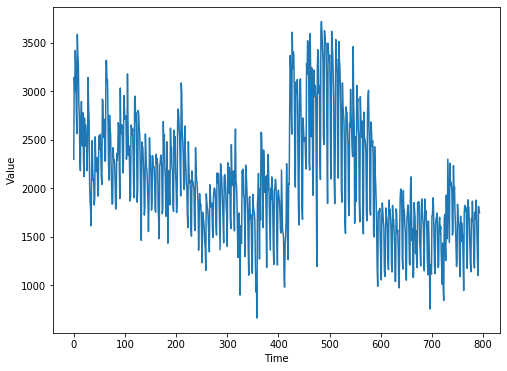

In [125]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.figure(figsize=(8,6))
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)
    
    
time = np.arange(0,794, dtype="float32")
series=np.array(sequence_data['Volume'])

split_time = 365
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 15
batch_size = 32
shuffle_buffer_size = 1000

plot_series(time, series)

In [122]:
print(series.shape, time.shape)

(794,) (794,)


In [123]:
print(x_train.shape, time_train.shape, x_valid.shape, time_valid.shape)

(365,) (365,) (429,) (429,)


In [124]:
x_valid

array([1671, 2576, 2566, 2331, 1920, 1593, 2393, 2250, 1958, 2119, 2042,
       1676, 1182, 2136, 1978, 2348, 2101, 1889, 1561, 1360, 1999, 1882,
       2116, 2038, 1755, 1376, 1213, 1972, 2000, 2091, 2061, 1890, 1477,
       1207, 1935, 1979, 1910, 1865, 1743, 1569, 1537, 2186, 1856, 1569,
       1534, 1486, 1076,  979, 1413, 1502, 1667, 2252, 1806, 1441, 1262,
       2048, 2040, 2822, 3368, 3187, 2788, 2557, 3608, 3235, 3405, 3383,
       2991, 2288, 2011, 3095, 2972, 3045, 3121, 2522, 1839, 1620, 2836,
       3096, 3127, 2808, 2474, 1802, 1678, 2724, 2617, 2482, 2487, 2522,
       2319, 2197, 3286, 3174, 3521, 3485, 3278, 2269, 2187, 3594, 3210,
       2530, 3241, 2892, 2086, 1925, 3219, 3076, 2944, 3059, 2911, 2133,
       1192, 3229, 3428, 3411, 2979, 3052, 2346, 2089, 3636, 3719, 3619,
       3449, 3332, 2519, 2450, 3623, 3552, 3499, 3495, 3156, 2342, 1842,
       3494, 3384, 3314, 3371, 3039, 2262, 2094, 3618, 3504, 3378, 3173,
       2913, 2096, 1840, 2410, 3533, 3319, 3330, 31

In [132]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
      dataset = tf.data.Dataset.from_tensor_slices(series)
      dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
      dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
      dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
      dataset = dataset.batch(batch_size).prefetch(1)
      return dataset

In [128]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

for window_dataset in dataset:
    for val in window_dataset:
      print(val.numpy(), end=" ")
      print()

[2299 3143 2994 3421 3241 2793 2562 3587 3384 3276 2872 2730 2302 2180
 2731 2894] 
[3143 2994 3421 3241 2793 2562 3587 3384 3276 2872 2730 2302 2180 2731
 2894 2650] 
[2994 3421 3241 2793 2562 3587 3384 3276 2872 2730 2302 2180 2731 2894
 2650 2437] 
[3421 3241 2793 2562 3587 3384 3276 2872 2730 2302 2180 2731 2894 2650
 2437 2777] 
[3241 2793 2562 3587 3384 3276 2872 2730 2302 2180 2731 2894 2650 2437
 2777 2314] 
[2793 2562 3587 3384 3276 2872 2730 2302 2180 2731 2894 2650 2437 2777
 2314 2119] 
[2562 3587 3384 3276 2872 2730 2302 2180 2731 2894 2650 2437 2777 2314
 2119 2724] 
[3587 3384 3276 2872 2730 2302 2180 2731 2894 2650 2437 2777 2314 2119
 2724 2431] 
[3384 3276 2872 2730 2302 2180 2731 2894 2650 2437 2777 2314 2119 2724
 2431 2655] 
[3276 2872 2730 2302 2180 2731 2894 2650 2437 2777 2314 2119 2724 2431
 2655 2571] 
[2872 2730 2302 2180 2731 2894 2650 2437 2777 2314 2119 2724 2431 2655
 2571 2520] 
[2730 2302 2180 2731 2894 2650 2437 2777 2314 2119 2724 2431 2655 2571
 2520

 2248 2305] 
[2304 2333 2108 1774 1858 2334 2224 2226 2223 2075 1785 1753 2348 2248
 2305 2231] 
[2333 2108 1774 1858 2334 2224 2226 2223 2075 1785 1753 2348 2248 2305
 2231 1779] 
[2108 1774 1858 2334 2224 2226 2223 2075 1785 1753 2348 2248 2305 2231
 1779 1674] 
[1774 1858 2334 2224 2226 2223 2075 1785 1753 2348 2248 2305 2231 1779
 1674 1478] 
[1858 2334 2224 2226 2223 2075 1785 1753 2348 2248 2305 2231 1779 1674
 1478 2231] 
[2334 2224 2226 2223 2075 1785 1753 2348 2248 2305 2231 1779 1674 1478
 2231 2260] 
[2224 2226 2223 2075 1785 1753 2348 2248 2305 2231 1779 1674 1478 2231
 2260 2341] 
[2226 2223 2075 1785 1753 2348 2248 2305 2231 1779 1674 1478 2231 2260
 2341 2281] 
[2223 2075 1785 1753 2348 2248 2305 2231 1779 1674 1478 2231 2260 2341
 2281 2226] 
[2075 1785 1753 2348 2248 2305 2231 1779 1674 1478 2231 2260 2341 2281
 2226 1736] 
[1785 1753 2348 2248 2305 2231 1779 1674 1478 2231 2260 2341 2281 2226
 1736 1779] 
[1753 2348 2248 2305 2231 1779 1674 1478 2231 2260 2341 2281 22

 1886 1614] 
[1502 1342 2035 1949 1807 1814 1845 1587 1492 1896 1985 2001 1982 1886
 1614 1516] 
[1342 2035 1949 1807 1814 1845 1587 1492 1896 1985 2001 1982 1886 1614
 1516 2155] 
[2035 1949 1807 1814 1845 1587 1492 1896 1985 2001 1982 1886 1614 1516
 2155 2053] 
[1949 1807 1814 1845 1587 1492 1896 1985 2001 1982 1886 1614 1516 2155
 2053 2155] 
[1807 1814 1845 1587 1492 1896 1985 2001 1982 1886 1614 1516 2155 2053
 2155 2144] 
[1814 1845 1587 1492 1896 1985 2001 1982 1886 1614 1516 2155 2053 2155
 2144 1873] 
[1845 1587 1492 1896 1985 2001 1982 1886 1614 1516 2155 2053 2155 2144
 1873 1597] 
[1587 1492 1896 1985 2001 1982 1886 1614 1516 2155 2053 2155 2144 1873
 1597 1366] 
[1492 1896 1985 2001 1982 1886 1614 1516 2155 2053 2155 2144 1873 1597
 1366 2250] 
[1896 1985 2001 1982 1886 1614 1516 2155 2053 2155 2144 1873 1597 1366
 2250 2151] 
[1985 2001 1982 1886 1614 1516 2155 2053 2155 2144 1873 1597 1366 2250
 2151 2119] 
[2001 1982 1886 1614 1516 2155 2053 2155 2144 1873 1597 1366 22

### single layer NN

In [133]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
# print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size]) #this is equivalent to regression
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

print("Layer weights {}".format(l0.get_weights()))

Layer weights [array([[-0.19900768],
       [ 0.37373343],
       [ 0.02669278],
       [-0.08104321],
       [ 0.04698398],
       [-0.0413368 ],
       [-0.06942277],
       [-0.301503  ],
       [ 0.4584711 ],
       [ 0.00969963],
       [ 0.06084448],
       [-0.05778561],
       [ 0.0672648 ],
       [ 0.03380981],
       [ 0.6439869 ]], dtype=float32), array([0.00072817], dtype=float32)]


<Figure size 720x432 with 0 Axes>

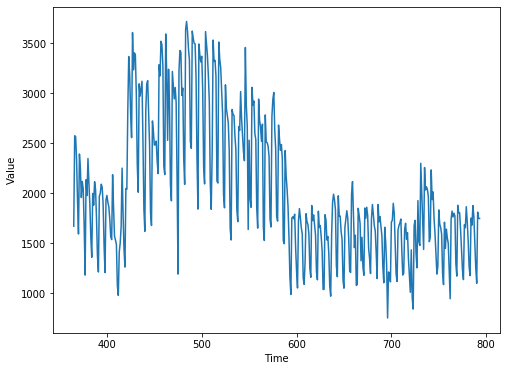

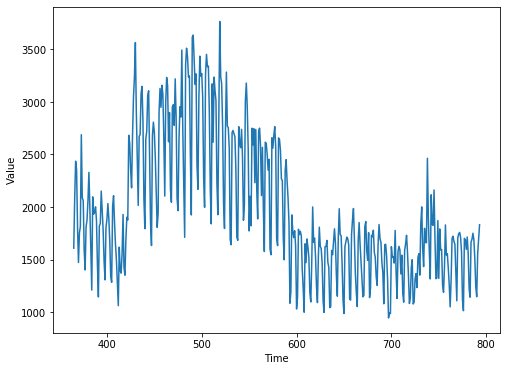

In [152]:
forecast = []

for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [153]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

176.67181

### DNN

In [137]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

#change momentum improves accuracy
#adam didn't work as well
dnn_model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)) 
dnn_model.fit(dataset,epochs=500,verbose=0)

In [110]:
series[time:time + window_size]

array([1750, 1861, 1778, 1450, 1348, 1198, 1747, 1888, 1788, 1675, 1623,
       1404, 1147, 1888, 1715, 1767, 1671, 1574, 1266, 1105, 1661, 1510,
       1282,  753, 1213, 1196, 1114, 1711, 1731, 1900], dtype=int64)

<Figure size 720x432 with 0 Axes>

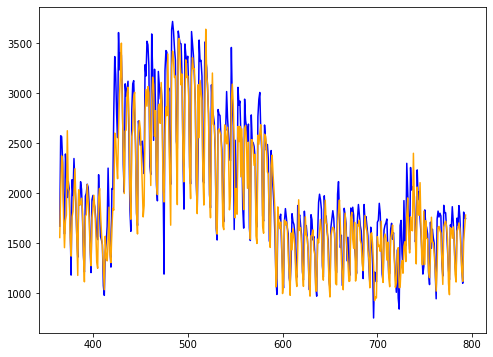

In [155]:
forecast = []
for time in range(len(series) - window_size):
    forecast.append(dnn_model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plt.figure(figsize=(8,6))
plt.plot(time_valid, x_valid, color='blue')
plt.plot(time_valid, results,color='orange');

In [156]:
valid_df=pd.DataFrame()

valid_df['time']=time_valid
valid_df['actual']=x_valid
valid_df['forecast']=results

In [157]:
valid_df

,time,actual,forecast
0,365.0,1671,1557.924561
1,366.0,2576,2019.589722
2,367.0,2566,2374.871338
3,368.0,2331,2305.166260
4,369.0,1920,1785.382812
5,370.0,1593,1456.357544
6,371.0,2393,1727.663940
7,372.0,2250,1782.452271
8,373.0,1958,2626.019775
9,374.0,2119,2052.274902


In [158]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()
# EXPECTED OUTPUT
# A Value less than 3

192.9724

### Use Learning Rate Scheduler to Find the Optimal LR

In [159]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch/20)
)

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9))
history = model.fit(dataset, epochs=500, callbacks=[lr_schedule], verbose=0)

In [ ]:
for i in np.arange(100)/20:
    print(1e-8*10 ** i)

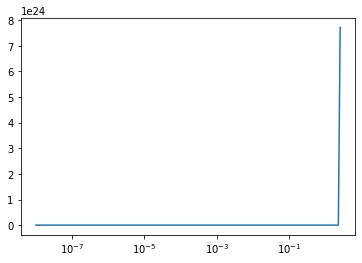

In [166]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs, history.history["loss"])
# plt.axis([1e-8, 1e-3, 0, 500])

In [167]:
import pandas as pd
history_df=pd.DataFrame()
history_df['lr']=lrs
history_df['loss']=history.history['loss']

In [168]:
history_df.head(10)

,lr,loss
0,1.000000e-08,5.934295e+06
1,1.122018e-08,4.889412e+06
2,1.258925e-08,4.614829e+06
3,1.412538e-08,4.614801e+06
4,1.584893e-08,4.614768e+06
5,1.778279e-08,4.614732e+06
6,1.995262e-08,4.614690e+06
7,2.238721e-08,4.614643e+06
8,2.511886e-08,4.614591e+06
9,2.818383e-08,4.614531e+06


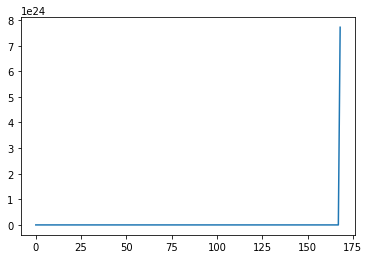

In [172]:
plt.plot(history_df['loss'])

In [169]:
history_df['loss'].min()
print(history_df[history_df.loss == history_df.loss.min()]) 

          lr           loss
50  0.000003  195252.404464


### Retrained with Optimal LR

In [173]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

#change momentum improves accuracy
#adam didn't work as well
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=0.000003, momentum=0.8)) 
history = model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500
11/11 [==============================] - 1s 56ms/step - loss: 15973869366425698.0000
Epoch 2/500
11/11 [==============================] - 0s 14ms/step - loss: 77826291.3288
Epoch 3/500
11/11 [==============================] - 0s 14ms/step - loss: 89209296.6857
Epoch 4/500
11/11 [==============================] - 0s 18ms/step - loss: 90207435.6738
Epoch 5/500
11/11 [==============================] - 0s 13ms/step - loss: 90489706.0821
Epoch 6/500
11/11 [==============================] - 0s 14ms/step - loss: 90304460.3470
Epoch 7/500
11/11 [==============================] - 0s 14ms/step - loss: 90134730.6764
Epoch 8/500
11/11 [==============================] - 0s 13ms/step - loss: 90240168.9018
Epoch 9/500
11/11 [==============================] - 0s 14ms/step - loss: 90185377.7247
Epoch 10/500
11/11 [==============================] - 0s 14ms/step - loss: 90256643.7236
Epoch 11/500
11/11 [==============================] - 0s 14ms/step - loss: 90184989.4816
Epoch 12/500
11/11 [=

11/11 [==============================] - 0s 14ms/step - loss: 85400490.0779
Epoch 93/500
11/11 [==============================] - 0s 14ms/step - loss: 85445211.3745
Epoch 94/500
11/11 [==============================] - 0s 15ms/step - loss: 85223822.0842
Epoch 95/500
11/11 [==============================] - 0s 15ms/step - loss: 85158287.7299
Epoch 96/500
11/11 [==============================] - 0s 18ms/step - loss: 85410820.4592
Epoch 97/500
11/11 [==============================] - 0s 14ms/step - loss: 84826282.7719
Epoch 98/500
11/11 [==============================] - 0s 25ms/step - loss: 84797840.1247
Epoch 99/500
11/11 [==============================] - 0s 15ms/step - loss: 85305899.6987
Epoch 100/500
11/11 [==============================] - 0s 26ms/step - loss: 84591604.5964
Epoch 101/500
11/11 [==============================] - 0s 15ms/step - loss: 84633503.9709
Epoch 102/500
11/11 [==============================] - 0s 17ms/step - loss: 84696888.2410
Epoch 103/500
11/11 [==========

11/11 [==============================] - 0s 14ms/step - loss: 80387827.1709
Epoch 184/500
11/11 [==============================] - 0s 14ms/step - loss: 80331652.5465
Epoch 185/500
11/11 [==============================] - 0s 13ms/step - loss: 80105081.4545
Epoch 186/500
11/11 [==============================] - 0s 13ms/step - loss: 80165958.8821
Epoch 187/500
11/11 [==============================] - 0s 13ms/step - loss: 80195056.8353
Epoch 188/500
11/11 [==============================] - 0s 13ms/step - loss: 80132141.9179
Epoch 189/500
11/11 [==============================] - 0s 13ms/step - loss: 79906212.7875
Epoch 190/500
11/11 [==============================] - 0s 13ms/step - loss: 79941049.2675
Epoch 191/500
11/11 [==============================] - 0s 13ms/step - loss: 80083525.9179
Epoch 192/500
11/11 [==============================] - 0s 13ms/step - loss: 79763129.1636
Epoch 193/500
11/11 [==============================] - 0s 13ms/step - loss: 79703241.8784
Epoch 194/500
11/11 [===

11/11 [==============================] - 0s 13ms/step - loss: 75578000.8727
Epoch 275/500
11/11 [==============================] - 0s 13ms/step - loss: 75810484.0436
Epoch 276/500
11/11 [==============================] - 0s 14ms/step - loss: 75521741.6644
Epoch 277/500
11/11 [==============================] - 0s 13ms/step - loss: 75428562.2525
Epoch 278/500
11/11 [==============================] - 0s 13ms/step - loss: 75510993.5834
Epoch 279/500
11/11 [==============================] - 0s 13ms/step - loss: 75431938.0281
Epoch 280/500
11/11 [==============================] - 0s 13ms/step - loss: 75271795.6613
Epoch 281/500
11/11 [==============================] - 0s 13ms/step - loss: 75281620.2805
Epoch 282/500
11/11 [==============================] - 0s 13ms/step - loss: 75134829.6644
Epoch 283/500
11/11 [==============================] - 0s 13ms/step - loss: 75129355.7486
Epoch 284/500
11/11 [==============================] - 0s 13ms/step - loss: 75144508.7044
Epoch 285/500
11/11 [===

11/11 [==============================] - 0s 14ms/step - loss: 71204955.1917
Epoch 366/500
11/11 [==============================] - 0s 13ms/step - loss: 71014821.4109
Epoch 367/500
11/11 [==============================] - 0s 14ms/step - loss: 71103210.0197
Epoch 368/500
11/11 [==============================] - 0s 14ms/step - loss: 71154081.6540
Epoch 369/500
11/11 [==============================] - 0s 13ms/step - loss: 71109072.8270
Epoch 370/500
11/11 [==============================] - 0s 13ms/step - loss: 71010591.9751
Epoch 371/500
11/11 [==============================] - 0s 13ms/step - loss: 70903163.8317
Epoch 372/500
11/11 [==============================] - 0s 14ms/step - loss: 71113037.2447
Epoch 373/500
11/11 [==============================] - 0s 13ms/step - loss: 70915414.3543
Epoch 374/500
11/11 [==============================] - 0s 13ms/step - loss: 70969271.1979
Epoch 375/500
11/11 [==============================] - 0s 13ms/step - loss: 71096700.5299
Epoch 376/500
11/11 [===

11/11 [==============================] - 0s 13ms/step - loss: 67132985.7725
Epoch 457/500
11/11 [==============================] - 0s 13ms/step - loss: 67326151.3122
Epoch 458/500
11/11 [==============================] - 0s 13ms/step - loss: 66922813.4608
Epoch 459/500
11/11 [==============================] - 0s 14ms/step - loss: 67261269.5106
Epoch 460/500
11/11 [==============================] - 0s 13ms/step - loss: 66988058.6057
Epoch 461/500
11/11 [==============================] - 0s 14ms/step - loss: 66873815.6571
Epoch 462/500
11/11 [==============================] - 0s 13ms/step - loss: 66841213.0161
Epoch 463/500
11/11 [==============================] - 0s 14ms/step - loss: 66723234.7886
Epoch 464/500
11/11 [==============================] - 0s 14ms/step - loss: 66780317.9740
Epoch 465/500
11/11 [==============================] - 0s 14ms/step - loss: 66391372.0790
Epoch 466/500
11/11 [==============================] - 0s 13ms/step - loss: 66776796.0021
Epoch 467/500
11/11 [===

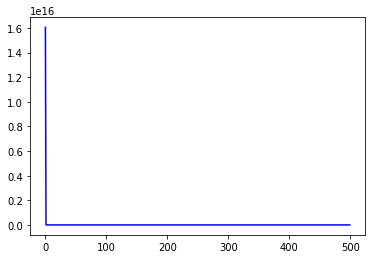

In [174]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

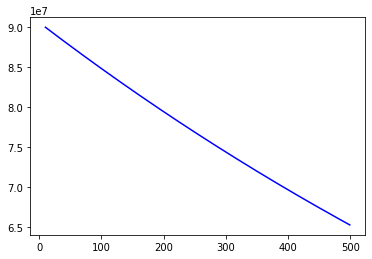

In [175]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
# print(plot_loss)
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

<Figure size 720x432 with 0 Axes>

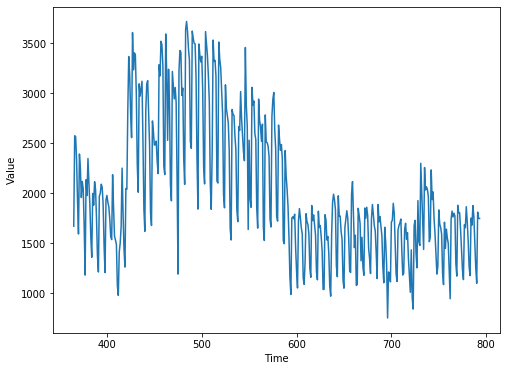

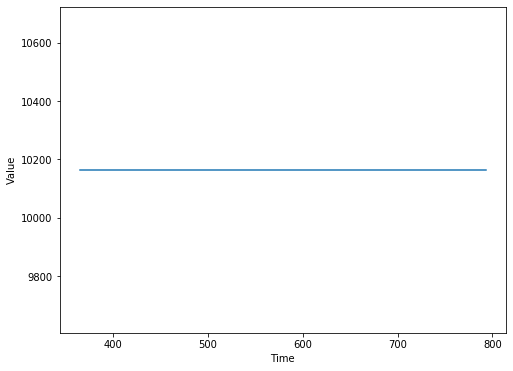

In [176]:
forecast = []
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [177]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

8132.5854